<h1><center>Dimentionality Reduction - Kernel Principal Component Analysis</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Manifold Learning Kernal PCA
  * Kernal PCA uses a mathemetical technique to derive principle components on high-dimentional space. This technique making it possible to perform complex nonlinear projections for dimensionality reduction. It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

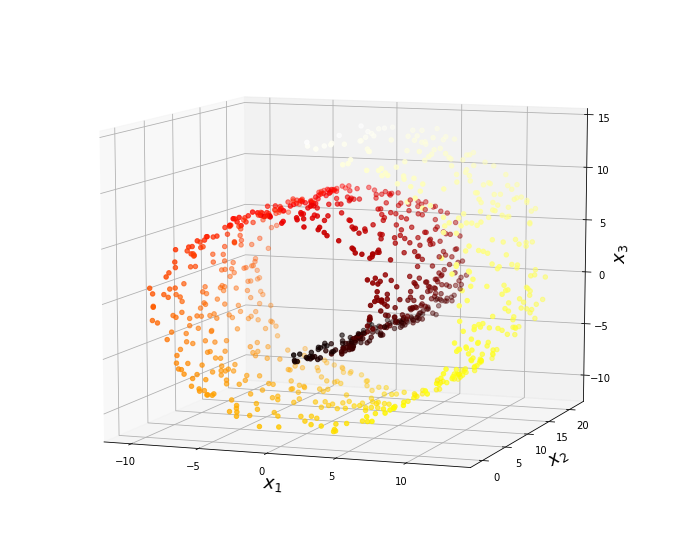

In [2]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

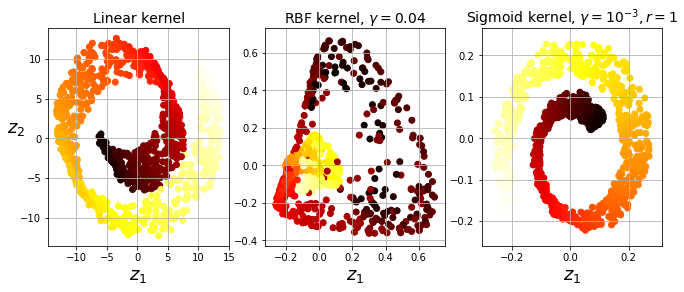

In [3]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

### How to choose Best Kernal and Hyperparameters (KernalPCA is unsupervised)
  * **Approach 1 : One way to select best kernel and hyperparameter values** is to **use "GridSearchCV"**. Select the kernel and hyperparameters that lead to the best performance on that task. **(dimensionality reduction is often a preparation step for a supervised learning task)**
  * **Approach 2 : Other way is to (this time entirely unsupervised) select the kernel and hyperparameters that yield the lowest reconstruction error.** To perform Inverse Transformation, we need use fit_inverse_transform = True, by default this is false in KernalPCA class.

### Approach 1 : GridSearchCV

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

clf_pipeline = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]
y = t > 6.9

grid_search = GridSearchCV(clf_pipeline, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [5]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


### Approach 2: Reconstruction Error

In [6]:
X.shape

(1000, 3)

In [7]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
rbf_X_reduced = rbf_pca.fit_transform(X)
print("RBF reduced shape", rbf_X_reduced.shape)
rbf_X_preimage = rbf_pca.inverse_transform(rbf_X_reduced)
print("RBF reconstructed shape", rbf_X_preimage.shape)

RBF reduced shape (1000, 2)
RBF reconstructed shape (1000, 3)


In [8]:
linear_pca = KernelPCA(n_components = 2, kernel="linear",
                    fit_inverse_transform=True)
linear_X_reduced = linear_pca.fit_transform(X)
linear_X_preimage = linear_pca.inverse_transform(linear_X_reduced)

In [9]:
from sklearn.metrics import mean_squared_error

print("RBF Reconstrution Error : ", mean_squared_error(X, rbf_X_preimage))
print("Linear Reconstrution Error : ", mean_squared_error(X, linear_X_preimage))

RBF Reconstrution Error :  32.78630879576614
Linear Reconstrution Error :  51.584634902312764


In [11]:
pca_1000 = KernelPCA(kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
X_reduced = pca_1000.fit_transform(X)
X_reduced.shape

(1000, 997)